<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Notebook 5: Data Analysis with Pandas

*Developed by Raoul Collenteur, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*

In this Notebook we will look into data analysis using Pandas. Pandas (http://pandas.pydata.org) is one of the most popular packages in Python and is used to analyse (big) data. With Pandas, analyzing big-data becomes much easier and faster. With more and more data being collected every day, data analysis becomes more a more important part of Earth Scientists' every day jobs.


## Lecture content

1. [Reading and writing CSV files](#1.-Reading-and-writing-CSV-files)
2. [The Pandas DataFrame and indexing](#2.-The-Pandas-DataFrame-and-indexing)
3. [Descriptive statistics](#3.-Descriptive-statistics)
4. [Plotting data](#4.-Plotting-data)
5. [Time series data](#5.-Time-series-data)
6. [Answers to Exercises](#6.-Anwers-to-Exercises)




In [1]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 1. Reading and writing CSV files
In a previous lecture we learned how to use the `loadtxt` method from Numpy to load data from a text file. This method returns a Numpy array, which is particularly usefull when looking at numerical data (floats, integers). Often we also have other data types (e.g., strings, booleans) stored in a file, and it is better to put the data in another data format. Pandas provides a very strong data type to work with tabular data (Excel-like) in Python: the Pandas `DataFrame`.

To load data from a file, like txt, csv,or xlsx, we can use Pandas `read_csv` method. This is a very usefull method to load tabular data from text files. In the code-block below, we use `delimiter=";"` to indicate that the data is separated by a semi-colon, and `index_col=0` to use the first column as the index column.

In [ ]:
fname = "Size-Slope-Data-Points.csv"

df = pd.read_csv(fname, delimiter=";", index_col=0)

print(type(df))

The data is loaded into a Pandas `DataFrame`, a data structure that has all kinds of usefull functions attached to it. For example, to obtain a quick look at the data we may call the `head` function. This function prints the first 5 rows of the data for a quick view into the avaialble data (structure).

In [ ]:
df.head()

If we want to write a `DataFrame` to file, we can use the `to_csv` method. The first argument of this method is the name (or path) of the file that is created.

In [ ]:
df.to_csv("test_file.csv")

### Exercise 1

In this exercise we want to read in only specific parts the data stored in the file `Size-Slope-Data-Points.csv`. Go to [the documentation](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table) of the `read_csv` method and read about the different input arguments.

1. Read only the first 100 lines and use the columns "Clast size ()", and "Slope (deg)".

In [ ]:
# Type your answer here

[Answer](#Answers-to-Exercises)

## 2. The Pandas DataFrame and indexing
The Pandas DataFrame can be used to store 2D (tabular) data, similar to the data in a spreadsheet (e.g., Excel). Each column can have it's own data type (e.g., floats, ints, strings). A `DataFrame` has many functions connected the object that can be used to analyse the data. The functions range from descriptive statistics, to resampling, and plotting. If you want to learn more about the DataFrame object, check out [this documentation](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe). 

Note that the first column is the `index` column.

In [ ]:
df.index

There are several option to access (a subset of) the data stored in a `DataFrame`. This can be a bit confusing in the beginning, but it is fairly similar to accessing data in Numpy `arrays`. 

In [ ]:
# To access a single columns, simply use the column name
df["Type"]

In [ ]:
df.columns

To get the unique values in the column "Type" we can use the function `unique()`. 

In [ ]:
df["Type"].unique()

### Accessing data using .loc and .iloc

The recommended method to access that in a `DataFrame` is through the use of `.loc` and `.iloc`. The first method uses the data type of the columns, while the second uses integers to select data (exactly like Numpy). Let's have a look at some examples:

In [ ]:
# To select all rows, one column named "Type"
df.loc[:, "Type"]

or to use iloc

In [ ]:
# To select all rows, two column
df.loc[:, ["Type", 'Slope (deg)']]

`iloc` only uses integers, for example as follows:

In [ ]:
# Select the first three rows from the first column (not the index)
df.iloc[:3, 0:3]

### Selecting data with boolean indexers

We may also use conditional statements to select specific parts of the data that agree with a certain condition. For example, let's imagine we want to select all the rows where the slope > 5 degrees.

In [ ]:
df.loc[df.loc[:, "Slope (deg)"] > 5, :]

In [ ]:
# These conditional statement can also be combined 
df.loc[(df.loc[:, "Slope (deg)"] > 5) & (df.loc[:, "Clast size (mm)"] > 5), :] 

### Creating Setting data

Often we want create a new `DataFrame` and store some data in it. Here's how to create an empty DataFrame with index and columns.

In [ ]:
data = pd.DataFrame(index=[1,2,3], columns=["A", "B"])
data

Say we want to set the value for row 3 and column B to 6.0. 

In [ ]:
data.loc[3, "B"] = 6.0
data

In [ ]:
data.loc[:, "A"] = [9, 4.5, 3]
data

The above DataFrame still has NaN-values (Not a Number) left. Pandas provides a convenient method to replace all NaN-values in a DataFrame at once: `fillna`. 

In [ ]:
data.fillna(0)
data

What happened above? The method `fillna` actually return a copy of the data, and not the DataFrame itself. That means to original data is not changed. Therefore we need to store the data again as follows:

In [ ]:
data = data.fillna(0)
data

### Exercise 2

1. Load the data from `Size-Slope-Data-Points.csv` into a DataFrame
2. print the number of rows with the type "Unknowns".
3. Replace all instances with the value "6" in the column "Type" with "Unknown".


In [ ]:
# Type your answer here

[Answer](#Answers-to-Exercises)

## 3. Descriptive statistics

Descriptive statistics can be used to describe and summarize the data. Common questions are what the mean and standard deviation of a collection of data are. Pandas provides some basic utility functions to describe and summarize your data, usefull when reporting on your data in a report. The `describe` method provides a nice summary table of the data.

In [ ]:
fname = "Size-Slope-Data-Points.csv"
df = pd.read_csv(fname, delimiter=";", index_col=0)

df.describe()

In [ ]:
df.quantile(0.5)

In [ ]:
df.mean()

### Exercise 3
Report the standard deviation, kurtosis and the median of the "Slope (deg)", but only for rows where the clkast size exceeds 50 mm. Do not use the `df.describe()` method but use the individual functions! Round all reported values to 2 decimals. You may need to look at the Pandas docs.

In [ ]:
#Type your answer here

[Answer](#Answers-to-Exercises)

## 4. Plotting data

Data visualization is an important part of data analysis, and is also supported by Pandas. Visualizing your data is often the quickest and easiest method to analyse your data and obtain a better understanding. See [the Documentation](https://pandas.pydata.org/docs/reference/frame.html#plotting) for all the plotting possibilities. Pandas plotting is directly built upon Matplotlib, so many of the commands we learned in the Matplotlib lecture can be used.

In [ ]:
fname = "Size-Slope-Data-Points.csv"
df = pd.read_csv(fname, delimiter=";", index_col=0)

df.plot()

In [ ]:
df.plot(subplots=True, figsize=(10,4))

making histograms to look at the distribution of your data is very easy as well

In [ ]:
ax = df.loc[:, "Slope (tan)"].plot.hist(bins=20)
ax.set_title("histogram")
ax.set_xlabel("Slope (tan)")

Often we want to look at the relationship between two variables (two columns). This can be done is follows

In [ ]:
df.plot(x='Slope (deg)', y="Clast size ()", linestyle=" ", marker=".")
plt.ylabel("Clast size (mm)")
plt.xlabel("Slope (deg)")

### Exercise 4

In this exercise we will use the `boxplot` method to create three boxplots for three columns, grouped by the "Type".

1. Read the [documentation on boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot)
2. Select all the data for the columns "Type", "Slope (tan)", "Clast size ()", "Slope (deg)"
3. Create a boxplots, grouped by the "Type" column.
4. apply `plt.tight_layout`
5. Store the figure

In [ ]:
#Type your answer here

[Answer](#Answers-to-Exercises)

## 5. Time series data

Pandas is perhaps most known for its ability to deal with time series data. Time series data is data that is collected over time, and has both information on the variable of interest and the time a measurement was performed. Often this data is stored in tables, and the index is used to store the date and time (datetime) of the measurement. Pandas has a dedicated data structure for 1 dimensional time series data: the Pandas `Series`. If you want to learn more about the TimeSeries object, check out [this documentation](https://pandas.pydata.org/docs/user_guide/dsintro.html#series). 

Here we look at groundwater level time series (also called "heads") from a measurement station in Wagna, south of Graz. The data is available here http://doi.org/10.5281/zenodo.4548801, but is also provided with this notebook (head_wagna.csv). Lets load the time series and have a look what Pandas can do with time series data!


In [ ]:
fname = "head_wagna.csv"
ts = pd.read_csv(fname, index_col=0, infer_datetime_format=True, parse_dates=True, skiprows=1, squeeze=True)
type(ts)
ts

In [ ]:
ts.index

In [ ]:
print(type(ts.index))

This time series has very similar capabilities as the pandas `DataFrame` object we looked ast before.

In [ ]:
ts.plot(figsize=(10,2), color="k");
plt.ylabel("Head [m]")

In [ ]:
ts.describe()

### Selecting data by datetime

To select data based on a certain range of dates, we can used strings with the date. The string format is always "YYYY-MM-DD", where YYYY is the year, MM the month and DD the day. 

In [ ]:
ts.loc["2014"]

In [ ]:
ts.loc["2014-06":"2014-07"]

In [ ]:
ts.loc["2014-06-15":"2014-07-01"]

### Resampling time series

Another usefull option in Pandas is to resample time series data to different frequencies ([see Docs on resample here](https://pandas.pydata.org/docs/reference/resampling.html)). For example, imagine we have daily observations of the groundwater levels, but want to compute the average groundwater level for each year in the time series. We then simply `resample` the time series to annual values ("A") and compute the mean. 

In [ ]:
ts1 = ts.resample("A").mean()

In [ ]:
ts.plot(figsize=(10,2))
ts1.plot()
plt.legend(["Original", "Annual Mean"], ncol=2)
plt.ylabel("Head [m]")

### Exercise 5

1. Load the rainfall time series from file `rain_wagna.csv` into a Pandas `Series`.
2. Create a figure with 2 subplots below each other with sharex x-axes.
3. Select only the years 2013 and 2014 from the time series
4. Plot the monthly sums as a bar plot in the top plot.
5. Plot the cumulative sum (lookup the `cumsum` method) in the bottom plot

In [ ]:
# Type your answer here

[Answer](#Answers-to-Exercises)

## 6. Plotting and analysing complicated UV-Vis data

Let's use what we have learned so far to plot data from an UV-Vis datalogger in a well in the Leibnitzer Feld area downstream of Graz. 

As you probably know, dissolved substances change the absorption of water. At high concentrations, this is visible as coloration (e.g. beer has this nice, golden color) but at low concentrations this is not visible to the naked eye but can be "seen" by specialized equipment in changes in the absorption spectrum when shooting a flash of light through the water coloumn to a receiver. In [Haas et al. (2023)](https://doi.org/10.1007/s00767-022-00540-3) such a device is used to monitor nitrate concentrations in a groundwater well in high, timely resolution, finding some as of yet unseen fast changes in nitrate concentration.

We now plot more recent data that shows that the nitrate fluctuations discussed in the paper still persist, even after an upgrade to the datalogger.

In [40]:
# First, we read in the data
Leibnitz = pd.read_excel('Leibnitz_23_09.xlsx', index_col=0, header=0)

When reading in large and/or complicated files, it's always a good idea to do a quick check if you read it in how you expected it to work.
Let's check the head (or `....tail()` if that makes more sense) first and then look at the `.shape` of the dataframe:

In [24]:
Leibnitz.head()

,NO3 [mg/l],Temperature [°C],Turbidity [FTU],200.00 nm,202.50 nm,205.00 nm,207.50 nm,210.00 nm,212.50 nm,215.00 nm,...,700.00 nm,702.50 nm,705.00 nm,707.50 nm,710.00 nm,712.50 nm,715.00 nm,717.50 nm,720.00 nm,722.50 nm
2022-09-01 00:00:00,19.269,13.325,0.0,49.1356,47.4306,46.6589,46.6339,46.8157,46.7110,45.6564,...,-0.210928,-0.219130,-0.292372,-0.278387,-0.222637,-0.234992,-0.260853,-0.245709,-0.253608,-0.278388
2022-09-01 01:00:00,19.122,13.388,0.0,48.9852,47.4892,46.8025,46.6300,46.6960,46.6434,45.6735,...,-0.221633,-0.228655,-0.293898,-0.269827,-0.227889,-0.252387,-0.264899,-0.248411,-0.266883,-0.289625
2022-09-01 02:00:00,19.197,13.450,0.0,48.9828,47.4911,46.7732,46.5373,46.6558,46.7082,45.7286,...,-0.249439,-0.262870,-0.320925,-0.300069,-0.256688,-0.274679,-0.298496,-0.279658,-0.280267,-0.299855
2022-09-01 03:00:00,19.936,13.450,0.0,49.0901,47.5267,46.7052,46.5683,46.8259,46.8390,45.7891,...,-0.233272,-0.242497,-0.305360,-0.285152,-0.248662,-0.275507,-0.282666,-0.254081,-0.274782,-0.312920
2022-09-01 04:00:00,20.225,13.450,0.0,49.2155,47.5900,46.7084,46.5530,46.8208,46.8475,45.8230,...,-0.242877,-0.243081,-0.311835,-0.298909,-0.253915,-0.274494,-0.290458,-0.270323,-0.286194,-0.310740


In [17]:
Leibnitz.shape
# gives the "height" (number of rows in Excel) and "width" (number of columns in Excel)
# of the dataframe. We have one month of hourly data, so 30 * 24 = 720 rows and timestamps +
# 3 parameters and absorption from 200 nm to 722.5 nm in 2.5 nm intervals = (522.5/2.5) + 1 + 3
# = 213 columns. 

(720, 213)

As we have seen, we have successfully read in the data.
Since this is a well formatted and rather simple file, we can use the various inbuilt shortcuts of pandas.
If we want to only plot the nitrate, we can simply select it:

<AxesSubplot:xlabel='Date', ylabel='Nitrate [mg/l]'>

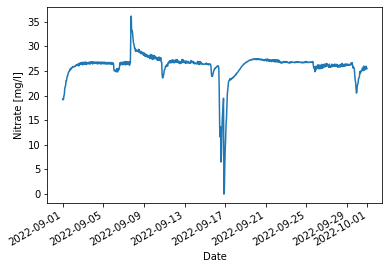

In [30]:

Leibnitz['NO3 [mg/l]'].plot(ylabel = 'Nitrate [mg/l]', xlabel = 'Date')


As we can see, this groundwater well mostly shows nitrate levels around 25 mg/l, but there's various events (most significant around the 8th and 17th of september) where we have a fast change in nitrate.
Let's zoom in on the biggest one, using pandas inbuilt time slicing capability:

<AxesSubplot:xlabel='Date', ylabel='Nitrate [mg/l]'>

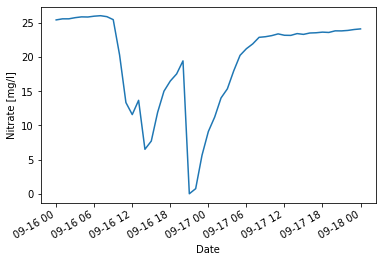

In [35]:
Leibnitz['2022-09-16':'2022-09-18 00:00']['NO3 [mg/l]'].plot(ylabel = 'Nitrate [mg/l]', xlabel = 'Date')


Let's explore the relationship of this jump in nitrate with temperature by plotting them in one plot.

<AxesSubplot:>

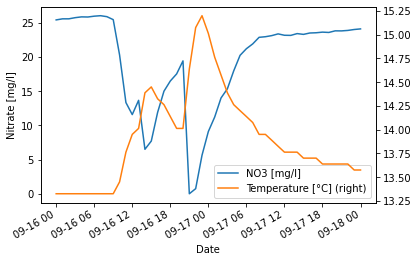

In [47]:
Leibnitz['2022-09-16':'2022-09-18 00:00']['NO3 [mg/l]'].plot(ylabel='Nitrate [mg/l]',
                                                            legend = True)
Leibnitz['2022-09-16':'2022-09-18 00:00']['Temperature [°C]'].plot(secondary_y=True,
                                                                  legend=True, xlabel='Date')
# We could also add a second ylabel, but then it would need subplot and axes. 
# Not sure if that's worth introducing.


Apparently, temperature and nitrate are almost a mirror image of each other in this event.
As this is in summer, a likely explanation is that there must be some pathway for (warm, nitrate free) summer rain to get directly into the groundwater or the well.

### Further investigation with correlations

As you probably remember from chemistry, various substances have various wavelengths where they have the most absorption.
Let's figure out some likely candidates for nitrate with a correlation matrix.

In [51]:
# Get rid of temperature and turbidity first:
Leibnitz_corr = Leibnitz.drop(Leibnitz.columns[[1,2]], axis=1)

In [56]:
Leibnitz_corr = Leibnitz_corr.corr()

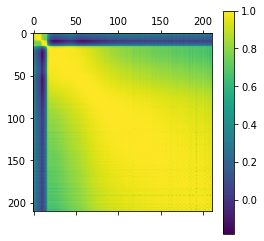

In [64]:
plt.matshow(Leibnitz_corr)
plt.colorbar()

<AxesSubplot:>

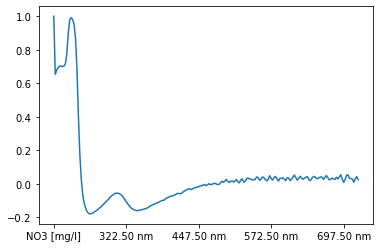

In [58]:
Leibnitz_corr['NO3 [mg/l]'].plot()

As we can see, the highest correlation (besides the R = 1 for nitrate with nitrate) is around 225 to 230 nm.

*Is there a literature value for it?*

## Extra: Going Spatial with GeoPandas

There is an exciting Project built upon Pandas, named GeoPandas, that is particularly interesting for geoscientists. The GeoPandas package can be used to perform GIS analyses through Python, to analyse spatial data with little effort. Check out the Documentation and examples on their website https://geopandas.org !

A short example is shown below:

In [ ]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf.plot()

## 7. Answers to Exercises

### Exercise 1

In [ ]:
fname = "Size-Slope-Data-Points.csv"

df = pd.read_csv(fname, delimiter=";", index_col=0, usecols=["Type", "Clast size ()", "Slope (deg)"], nrows=100)
# df = pd.read_csv(fname, delimiter=";", index_col=0, usecols=[0, 4, 5], nrows=100)  # Alternatively

df

### Exercise 2

In [ ]:
# Read data 
fname = "Size-Slope-Data-Points.csv"
df = pd.read_csv(fname, delimiter=";", index_col=0)

# Replace data with
df.loc[df.loc[:, "Type"] == "6", "Type"] = "Unknown"

# Print number of items
print(df.loc[df.loc[:, "Type"] == "Unknown", "Type"].index.size)

### Exercise 3

In [ ]:
# Read data 
fname = "Size-Slope-Data-Points.csv"
df = pd.read_csv(fname, delimiter=";", index_col=0)

df1 = df.loc[df.loc[:, "Clast size (mm)"] > 50, "Slope (deg)"]

print("the standard deviations is", df1.std().round(2))
print("the kurtosis is", df1.kurtosis().round(2))
print("the median is", df1.median().round(2))

### Exercise 4

In [ ]:
# Read data 
fname = "Size-Slope-Data-Points.csv"
df = pd.read_csv(fname, delimiter=";", index_col=0)

data = df.loc[:, ["Type", "Slope (tan)", "Clast size ()", "Slope (deg)"]]
data.boxplot(by="Type", layout=(1,3))
plt.tight_layout()
plt.savefig("my_figure.png")

### Exercise 5

In [ ]:
#1. Load the rainfall time series from file `rain_wagna.csv` into a Pandas `Series`.
fname = "rain_wagna.csv"
rain = pd.read_csv(fname, index_col=0, infer_datetime_format=True, parse_dates=True, skiprows=1, squeeze=True)

#2. Create a figure with 2 subplots
fig, [ax1, ax2] = plt.subplots(2, 1)

#3. Select only the years 2013 and 2014 from the time series
ts_sel = rain.loc["2013":"2014"]

#4. Plot the monthly sums in the left plot.
ts_sel.resample("M").sum().plot.bar(ax=ax1)

#5. Plot the cumulative sum in the right plot
ts_sel.cumsum().plot()

#6. Dress up the plot 
ax1.set_ylabel("Monthly\nrain [mm]")
ax2.set_ylabel("Cumulative\nRain [mm]")